# Lab 3: Clustering and Manifold Learning

### A. Import Python Modules and Dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

#### Loading the dataset 

In [35]:
df = pd.read_csv("./bank_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (2000, 32)


Checking that all varaibles are scaled and numerical . 

In [36]:
df.describe()

,age,education,balance,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_nan,...,job_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,previous_contact_no,contact_by_pdays,total_contact
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.797573,0.616750,0.864354,0.428383,0.363864,0.726829,0.090950,0.073500,0.222000,0.227000,...,0.005000,0.555500,0.337000,0.007500,0.481500,0.125000,0.500000,0.227000,0.566892,0.672510
std,0.293027,0.314713,0.403068,0.323740,0.279998,0.365006,0.137886,0.261021,0.415695,0.418997,...,0.070551,0.497034,0.472803,0.086299,0.499783,0.330802,0.500125,0.418997,0.432449,0.445184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072016,0.032790
25%,0.575364,0.500000,0.598166,0.133333,0.090909,0.467855,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211371,0.312375
50%,0.747214,0.500000,0.723184,0.366667,0.363636,0.684526,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.530628,0.530628
75%,1.021651,1.000000,1.036304,0.733333,0.545455,0.954190,0.100000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.804407,0.861482
max,1.642228,1.000000,4.059642,1.000000,1.000000,2.174069,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.325785,2.997398


### B. Scatterplot Function (to be used below for visualising a clustering) (Task 2)

Skip this section when you read the notebook for the first time.

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

Ref: Lab 3 - Clustering and Manifold Learning

In [20]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### C. Project data to 2D space

We initially explore manifold-learning techniques to project and plot the data on a 2D axis. This allows us to draw initial judgements of the number of clusters, k. 

#### C1. Multi-dimensional scaling (MDS) to project both the data to a 2D space

In [17]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data)
print("transformation complete")

/Users/brianodonovan/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


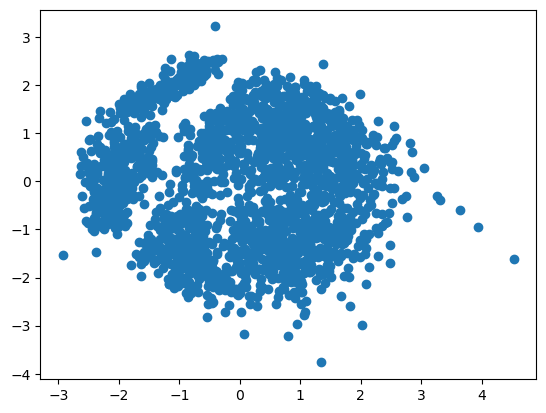

In [18]:
plt.scatter(XYcoordinates[:,0], XYcoordinates[:,1])

It appears k=3 is a good initial value of K.  

#### C2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [19]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data)
print("transformation complete")

transformation complete


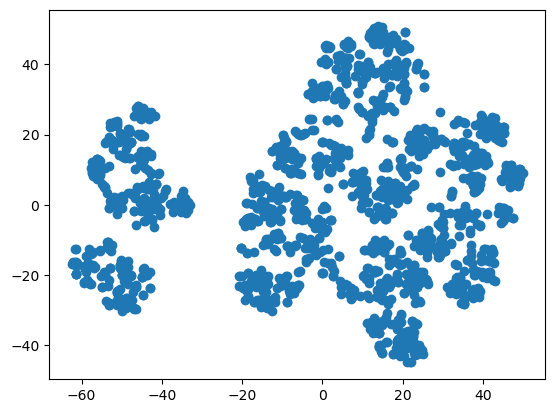

In [20]:
plt.scatter(XYcoordinates[:,0], XYcoordinates[:,1])

We will first attempt k=3, there are apparent clusters in the data from the t-SNE transform. Two smaller ones on the left, and one larger cluster on the right. 

### D. K-Means Clustering

In [21]:
k = 3

In [22]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=300).fit(data)

In [23]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [24]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/Users/brianodonovan/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


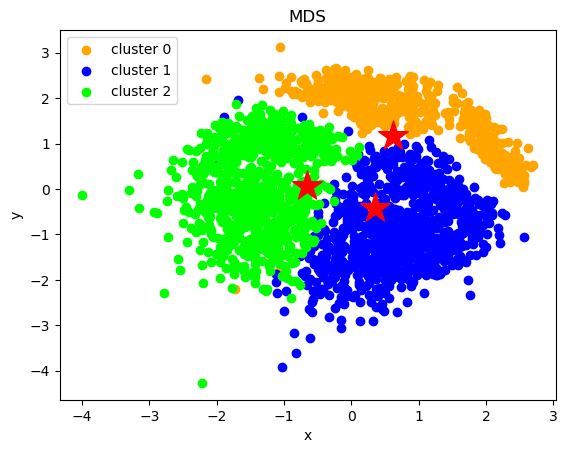

In [25]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

The clusters are clearly defined, however the boundaries of clusters 0 and 2 are not well defined. 

In [26]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


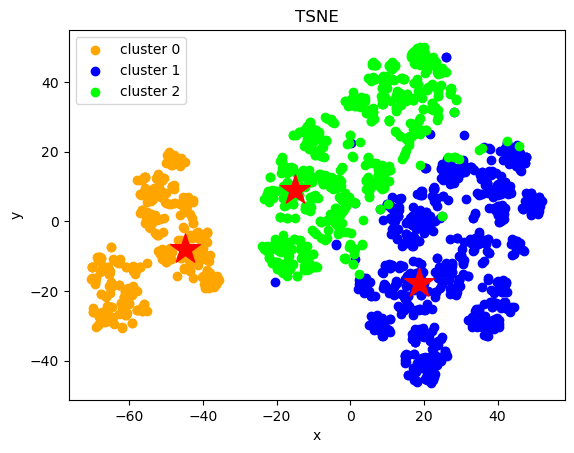

In [27]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

We see a good representation of the clusters from the t-SNE transform. The overlap of cluster 0 and 2 is more apparent. 

#### Hyperparameter Tuning

Trying another values of `n_init` and `max_iter`

In [28]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=400).fit(data)

In [29]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [30]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/Users/brianodonovan/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


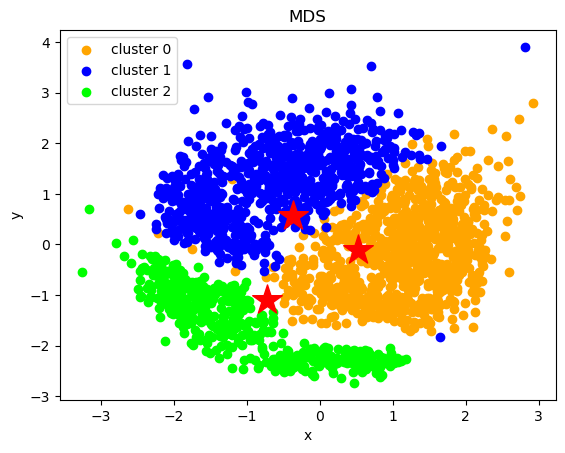

In [31]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

We see the values of cluster 0 still resemble some displacement. 

In [32]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


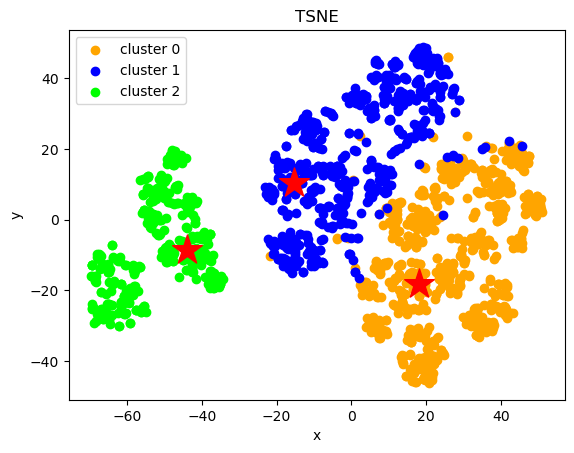

In [33]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

Tuning the hyperparamets clearly did not improve the border definition of cluster 0 and 1. Although this is only a few troublesome points so we can proceed with the clustering into 3 clusters. 

In [34]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=30, max_iter=500).fit(data)

In [35]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [36]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/Users/brianodonovan/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


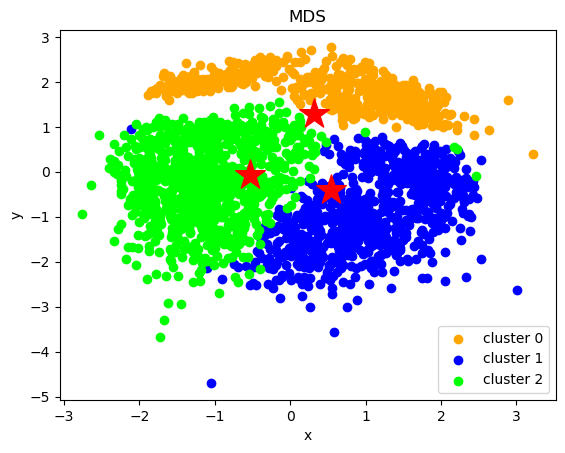

In [37]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

The overlap of values in cluster 1 and 0 are apparent. Similar to the inital clusting pattern. 

In [54]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


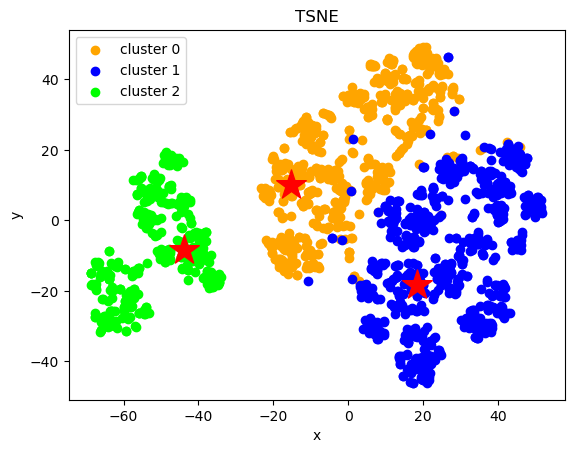

In [55]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

We proceed to use the inital cluster parameters, the recent adjustments did not reap any apparent improvements. 
k = 4
`n_init` = 20
`max_iter` = 300

We will run this clustering again to append the correct assignments to the data. 

In [38]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=300).fit(data)

In [39]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [40]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

#### Interpretation

In [41]:
df.head()

,age,education,balance,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_nan,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,previous_contact_no,contact_by_pdays,total_contact,cluster
0,0.575364,1.0,0.668238,0.0,0.272727,1.624770,0.1,0,0,0,...,0,1,0,1,0,0,0,0.426779,0.709676,1
1,0.773190,0.5,0.768220,0.0,0.272727,0.678012,0.1,0,0,0,...,0,0,0,1,1,0,0,0.267724,0.530628,1
2,1.187166,0.5,0.873966,0.0,0.272727,0.412593,0.1,0,0,0,...,1,0,0,1,1,0,0,0.400211,0.530628,1
3,0.959776,0.5,0.670367,0.0,0.272727,0.763570,0.0,0,0,0,...,1,0,0,1,1,0,0,0.645066,0.530628,1
4,1.098612,0.5,0.864961,0.0,0.272727,1.107159,0.0,0,0,0,...,1,0,0,1,0,0,0,0.476804,0.312375,1


In [42]:
df.tail()

,age,education,balance,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_nan,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,previous_contact_no,contact_by_pdays,total_contact,cluster
1995,0.105361,0.5,1.283472,0.500000,0.727273,0.864320,0.1,0,0,1,...,0,1,0,0,0,1,1,0.072016,0.312375,0
1996,0.441833,0.5,0.569369,0.500000,0.727273,1.901403,0.1,0,0,1,...,0,1,0,0,0,1,1,0.072016,0.312375,0
1997,1.504077,0.0,0.907800,0.533333,0.727273,0.673645,0.0,0,0,1,...,1,0,0,0,0,1,1,0.072016,0.032790,0
1998,0.938270,0.0,1.545186,0.633333,0.727273,0.567555,0.0,0,0,1,...,1,0,0,1,0,1,1,0.072016,0.032790,0
1999,0.798508,0.5,1.810978,0.700000,0.727273,0.622006,0.1,0,0,1,...,1,0,0,0,0,1,1,0.072016,0.312375,0


In [43]:
df.describe()

,age,education,balance,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_nan,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,previous_contact_no,contact_by_pdays,total_contact,cluster
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.797573,0.616750,0.864354,0.428383,0.363864,0.726829,0.090950,0.073500,0.222000,0.227000,...,0.555500,0.337000,0.007500,0.481500,0.125000,0.500000,0.227000,0.566892,0.672510,1.131500
std,0.293027,0.314713,0.403068,0.323740,0.279998,0.365006,0.137886,0.261021,0.415695,0.418997,...,0.497034,0.472803,0.086299,0.499783,0.330802,0.500125,0.418997,0.432449,0.445184,0.753984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072016,0.032790,0.000000
25%,0.575364,0.500000,0.598166,0.133333,0.090909,0.467855,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211371,0.312375,1.000000
50%,0.747214,0.500000,0.723184,0.366667,0.363636,0.684526,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.530628,0.530628,1.000000
75%,1.021651,1.000000,1.036304,0.733333,0.545455,0.954190,0.100000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.804407,0.861482,2.000000
max,1.642228,1.000000,4.059642,1.000000,1.000000,2.174069,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.325785,2.997398,2.000000


In [44]:
df.groupby('cluster').mean()

,age,education,balance,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_nan,...,job_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,previous_contact_no,contact_by_pdays,total_contact
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.732113,0.601322,0.835176,0.392584,0.453344,0.810031,0.079515,0.000000,0.000000,1.0,...,0.006608,0.477974,0.422907,0.008811,0.420705,0.070485,0.634361,1.0,0.072016,0.223337
1,0.799368,0.589264,0.777305,0.409127,0.151661,0.548390,0.100241,0.047045,0.008444,0.0,...,0.002413,0.611580,0.261761,0.012063,0.750302,0.230398,0.009650,0.0,0.683819,0.744685
2,0.836947,0.658298,0.983477,0.473315,0.552555,0.880459,0.087448,0.150628,0.609484,0.0,...,0.006974,0.539749,0.369596,0.001395,0.209205,0.037657,0.981869,0.0,0.745051,0.873473


#### Conclusion

By looking at the table above we can argue that:
* Cluster 0 are clients with an average balance and call duration. They are of below average age and have an average education. All of these clients had no previous contact before this campaign, and a low amount of total contact. Yet, there is an above average number of subscribers in the group. 
* Cluster 1 are clients who have had a large number of total contact, but contain little subscribers. There is an above average number of people with personal and housing loans, and default credit. These individuals have the lowest education among groups, and the shortest call duration. 
* Cluster 2 are mostly clients who subscribed, most of these people had a successful outcome in the previous campaign. These people have a large number of total contacts and a longer than average call duration. Additionally, they have the highest age, education and balance among goups. 
These conclusions are only for this specific run of k-means. 

### E. Comparing K - Elbow Method (Task 3)

In [45]:
sse = {}
for k in range(1, 10):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=300).fit(data)
    df["cluster"] = clustered_data_sklearn.labels_
    #print(data["clusters"])
    sse[k] = clustered_data_sklearn.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

In [46]:
sse

{1: 7304.582832879016,
 2: 6214.901388134884,
 3: 5423.812415700338,
 4: 5033.342499682429,
 5: 4723.943870661864,
 6: 4472.901398490923,
 7: 4329.632586767198,
 8: 4191.144189298186,
 9: 4069.68928457267}

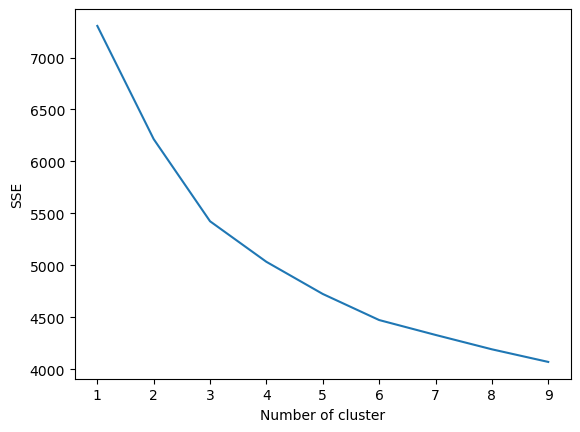

In [47]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

It is clear that there is an 'elbow' in the curve at 3 clusters. Our initial choice was apparently correct, this elbow signifies the lowest SS of distance from cluster centroids considering the number of clusters. 

### F. Comparing K - Silhouette Method (Task 4)

In [48]:
for k in range(2, 11):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=300).fit(data)
    label = clustered_data_sklearn.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.18106916350661925
For n_clusters=3, The Silhouette Coefficient is 0.16728268272473376
For n_clusters=4, The Silhouette Coefficient is 0.15245278271256732
For n_clusters=5, The Silhouette Coefficient is 0.16745552022245264
For n_clusters=6, The Silhouette Coefficient is 0.16013813805126034
For n_clusters=7, The Silhouette Coefficient is 0.1554048613477524
For n_clusters=8, The Silhouette Coefficient is 0.1536244157269196
For n_clusters=9, The Silhouette Coefficient is 0.1387372599972643
For n_clusters=10, The Silhouette Coefficient is 0.13814448451172917


It appears two clusters obtains the maximum silhouette coefficients. This result does not align with the elbow method, and we must consider both metrics in unison.  We will consider 2 clusters for analysis. 

In [49]:
k = 2

In [50]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=30, max_iter=500).fit(data)

In [51]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [52]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [53]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/Users/brianodonovan/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


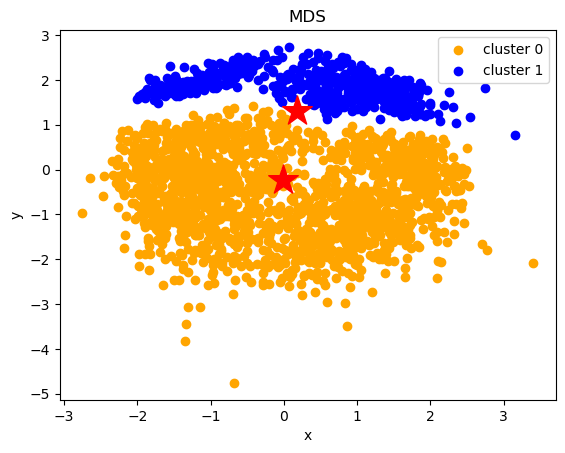

In [55]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

There is a clear definition of cluster and boundaries, and there is no apparent overlapping boundaries. We, however, note that 3 clusters effectively captures the 'split' apparent in cluster 2 here. 

In [56]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


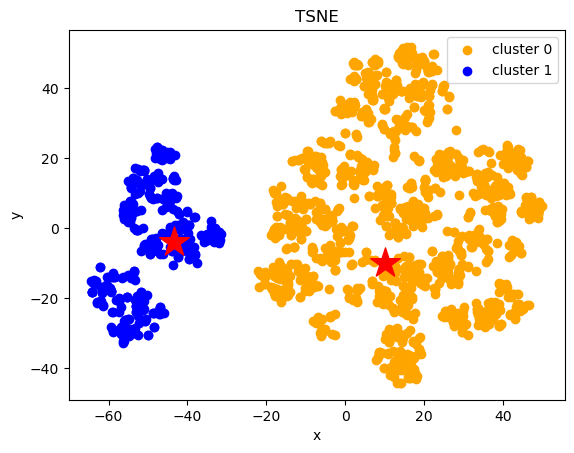

In [57]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

The cluster definition is very good for 2 clusters, with points within clusters close together, and points between clusters far apart. However, we can see that the cluster 1 from the above plot should be divided in two, this is captured by the 3 clusters. Lets interpret the groups. 

In [58]:
df.groupby('cluster').mean()

,age,education,balance,day,month,duration,campaign,poutcome_other,poutcome_success,poutcome_nan,...,job_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,previous_contact_no,contact_by_pdays,total_contact
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.816796,0.621281,0.872923,0.438896,0.337587,0.702396,0.094308,0.095084,0.287193,0.0,...,0.004528,0.578266,0.311772,0.007115,0.499353,0.141009,0.460543,0.0,0.712217,0.804414
1,0.732113,0.601322,0.835176,0.392584,0.453344,0.810031,0.079515,0.000000,0.000000,1.0,...,0.006608,0.477974,0.422907,0.008811,0.420705,0.070485,0.634361,1.0,0.072016,0.223337


Interestingly, there is an almost even spread of subscirbers and non-subscribers in each group, cluster 0 contains those who have been previously contacted, with a much greater number of total contacts, a larger proportion of loans and credit default. None of cluster 1 had a previous successful outcome, and members are have a lower mean age than those in cluster 1. 

### G. Alternative Method - Mean Shift (Task 5)

We fit the MeanShift clustering method from scikit-learn. 


Mean shift clustering is designed to identify clusters, resembling "blobs," within a continuous distribution of data points. Using centroid computation, this algorithm iteratively adjusts the centroids to the mean of points within a defined region. Subsequently, a post-processing step refines these candidate centroids, removing close duplicates to produce the ultimate set of centroids.

In [28]:
ms = MeanShift()

clustered_data = ms.fit(data)

cluster_centers = ms.cluster_centers_
labels = ms.labels_

# Number of clusters
n_clusters = len(cluster_centers)

In [32]:
data_and_centers = np.r_[data, cluster_centers]
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print('number of clusters: ', n_clusters_)

number of clusters:  2


The mean shift clustering method suggests 2 clusters, this is not effective and shows us the benefits of the k-means approach. 

In [31]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/Users/brianodonovan/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


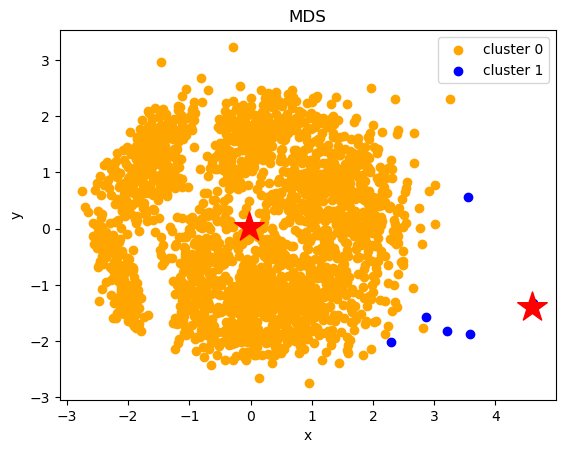

In [33]:
k = 2

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

We see the mean shift clustering method is less effective at capturing the clusters in the data. The Method has used the estimated bandwidth using the 30% quantile of pairwise distances. However, we could argue that the method has identified the central 'blob' of data. This is most likely not the best implementation of such method. 
